Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

## Significant links at alpha = 0.05:

    Variable $X^0$ has 1 link(s):
        ($X^0$ -1): pval = 0.00000 | qval = 0.00000 | val =  0.503

    Variable $X^1$ has 1 link(s):
        ($X^1$ -1): pval = 0.00000 | qval = 0.00000 | val =  0.507


/Users/muszynski/opt/anaconda3/envs/causal4220/lib/python3.9/site-packages/tigramite/pcmci.py:1468: UserWarning: return_significant_parents is DEPRECATED: use return_significant_links() instead and check updated key names.
  warnings.warn("return_significant_parents is DEPRECATED: use "
/Users/muszynski/opt/anaconda3/envs/causal4220/lib/python3.9/site-packages/tigramite/plotting.py:1357: MatplotlibDeprecationWarning: 
The figbox attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use get_position() instead.
  ax.figbox.bounds[1] + 0.02,


NotImplementedError: cannot remove artist

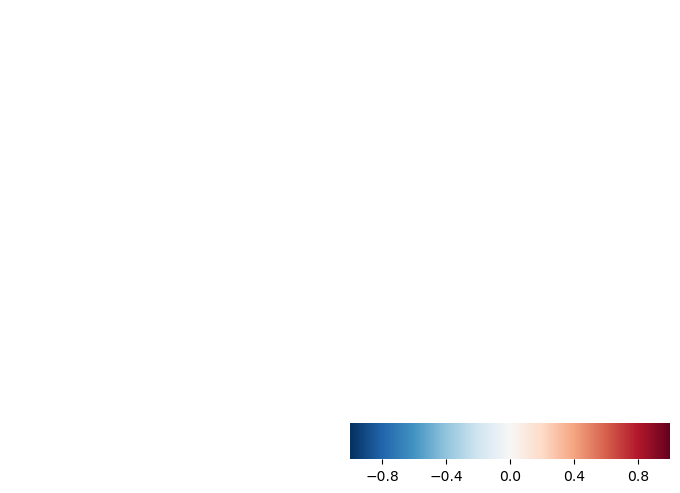

In [1]:
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
from tigramite.models import LinearMediation
from matplotlib import pyplot as plt
import numpy as np

seed=1
random_state = np.random.default_rng(seed=seed)
data = random_state.standard_normal((500, 2))
for t in range(1, 500):
    data[t, 0] += 0.6*data[t-1, 0]
    data[t, 1] += 0.6*data[t-1, 1] - 0.36*data[t-2, 0]
            
var_names = [r'$X^0$', r'$X^1$']
dataframe = pp.DataFrame(data, var_names=var_names)

parcorr = ParCorr(significance='analytic', mask_type=None)

pcmci = PCMCI(dataframe=dataframe, cond_ind_test=parcorr, verbosity=0)

pcmci.verbosity = 0
        
results = pcmci.run_pcmci(tau_min=1, tau_max=1, pc_alpha=None)

q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')

pcmci.print_significant_links(p_matrix = results['p_matrix'], q_matrix = q_matrix, val_matrix = results['val_matrix'], alpha_level = 0.05)
        
sig_parents = pcmci.return_significant_parents(pq_matrix=q_matrix, val_matrix=results['val_matrix'], alpha_level=0.05)

all_parents = sig_parents['parents']
link_matrix = sig_parents['link_matrix']

# Calculate beta coefficient
linear_mediator = LinearMediation(dataframe=dataframe, mask_type = 'y', data_transform = None)
linear_mediator.fit_model(all_parents = all_parents, tau_max=1)  

val_matrix = linear_mediator.get_val_matrix()

fig = plt.figure(figsize=(8, 6), frameon=False)
ax = fig.add_subplot(111, frame_on=False)
tp.plot_graph(val_matrix=val_matrix,link_matrix=link_matrix, var_names=var_names, fig_ax=(fig,ax))

plt.show()
